#### Описание данных:
date - дата\
time - время\
event - действие (просмотр/клик)\
platform - платформа\
ad_id - id объявления\
client_union_id - id рекламного кабинета\
campain_union_id - id рекламной компании\
ad_cost_type - тип оплаты\
ad_cost - цена\
has_video - есть ли видео\
target_audience_count - размер аудитории\

ads_clients_data.csv характеристики рекламных клиентов:\
date - дата\
client_union_id - id рекламного кабинета\
community_id - id сообщества\
create_date - дата создания рекламного клиента\

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [2]:
# Зададим размер рисунка
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
    )

In [3]:
# Данные рекламы
ads_data = pd.read_csv('ads_data.csv')

In [4]:
# Данные рекламных клиентов
ads_clients_data = pd.read_csv('ads_clients_data.csv')

In [5]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [6]:
ads_data.dtypes

date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
dtype: object

In [7]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [8]:
ads_clients_data.dtypes

date               object
client_union_id     int64
community_id        int64
create_date        object
dtype: object

In [9]:
# Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям.
# Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях
# не будет строк с кликами, а для подсчета среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

# Могут понадобится:
# pivot()
# fillna()

In [10]:
data_group_event = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'date': 'count'}) \
    .pivot(index = 'ad_id', columns = 'event', values = 'date') \
    .reset_index() \
    .fillna(0)

In [89]:
data_group_event.head()

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0


In [12]:
click_mean = data_group_event.click.mean()

In [13]:
view_mean = data_group_event.view.mean()

In [14]:
round(click_mean)

113

In [15]:
round(view_mean)

923

In [16]:
# Давайте посмотрим на распределение показов объявлений.
# По оси х - число показов
# По оси у - доля объявлений с такими показами

# Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.

# Используем настройки:
# sns.set(
#     font_scale=2,
#     style="whitegrid",
#     rc={'figure.figsize':(20,7)}
#     )

# Могут пригодиться:
# sns.displot
# np.log

In [17]:
# Отберем только количество показов для каждого объявления.
count_view = data_group_event[['view']]

In [88]:
count_view.head()

,date,count_mean
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677


In [19]:
# Прологарифмировать нули нельзя, поэтому нужно заменить
count_view = count_view.view.replace(0 , 1)

In [20]:
# Прологарифмируем значения в колонке, вернет колонку с логарифмом исходных значений.
log_view = np.log(count_view)

In [21]:
log_view

0      4.615121
1      5.214936
2      3.713572
3      3.555348
4      4.060443
         ...   
960    4.605170
961    5.049856
962    4.219508
963    4.927254
964    3.737670
Name: view, Length: 965, dtype: float64

C:\Users\uszai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view', ylabel='Density'>

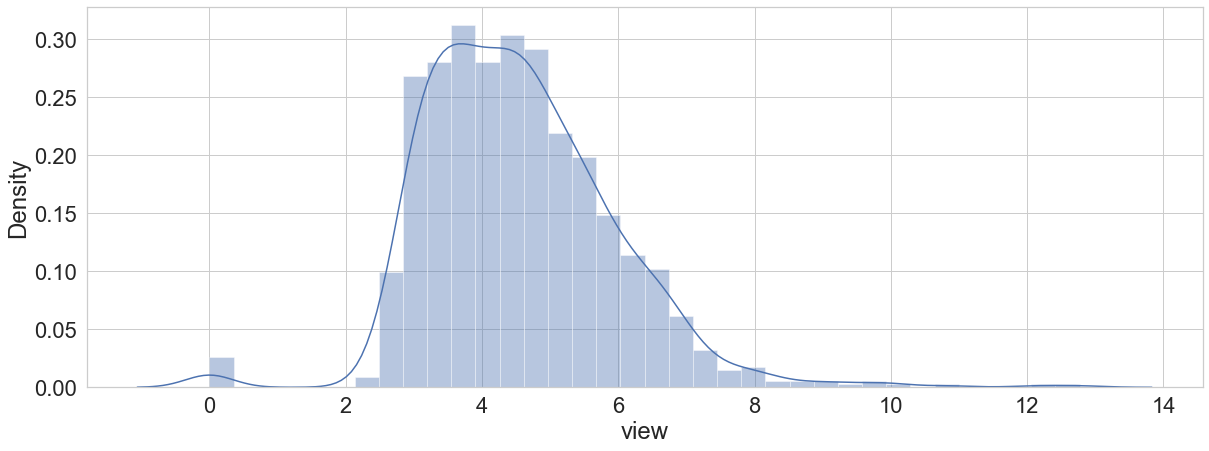

In [22]:
# Нарисуем график распределения
sns.distplot(log_view)

In [23]:
# Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, 
# у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном
# в 2 элемента.

# Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года. Округлите ответ до целого числа.

In [24]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [25]:
# Сгруппировали по ad_id и по date, нашли количество просмотров
count_view = ads_data.query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index=False) \
    .agg({'event': 'count'})

In [27]:
count_view.head()

,ad_id,date,event
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34


In [28]:
# Снова сгруппировали по дате и посчитали среднее количество просмотром по датам
count_view = count_view.groupby('date').agg({'event': 'mean'})

In [29]:
count_view = count_view.rename(columns = {'event': 'count_mean'})

In [30]:
# Посчитали скользящее среднее по полученному результату с окном в 2 элемента
roll_mean = count_view.rolling(2).mean().reset_index()

In [31]:
roll_mean

,date,count_mean
0,2019-04-01,NaN
1,2019-04-02,146.134626
2,2019-04-03,150.869880
3,2019-04-04,419.927249
4,2019-04-05,797.505699
5,2019-04-06,598.116202


In [32]:
roll_mean = roll_mean.rename(columns = {'event': 'roll_mean'})

In [33]:
# Скользящее среднее часто используется для аномалий данных. Давайте попробуем нанести на один график значения просто
# среднего количества показов по дням и скользящего среднего на основе этих данных(которое мы получили в прошлом задании).

# Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?
# Дни, в которых скользящее среднее равно Nan, не учитываем. Запишите ответ в формате yyyy-MM-dd

# Могут пригодиться:
# sns.lineplot()
# скользящее среднее
# значение по модулю

In [34]:
# Среднее количество заказов по дням
count_view = count_view.reset_index()

In [35]:
# Среднее количество заказов по дням
count_view

,date,count_mean
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [38]:
roll_mean

,date,count_mean
0,2019-04-01,NaN
1,2019-04-02,146.134626
2,2019-04-03,150.869880
3,2019-04-04,419.927249
4,2019-04-05,797.505699
5,2019-04-06,598.116202


C:\Users\uszai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\uszai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count_mean', ylabel='Density'>

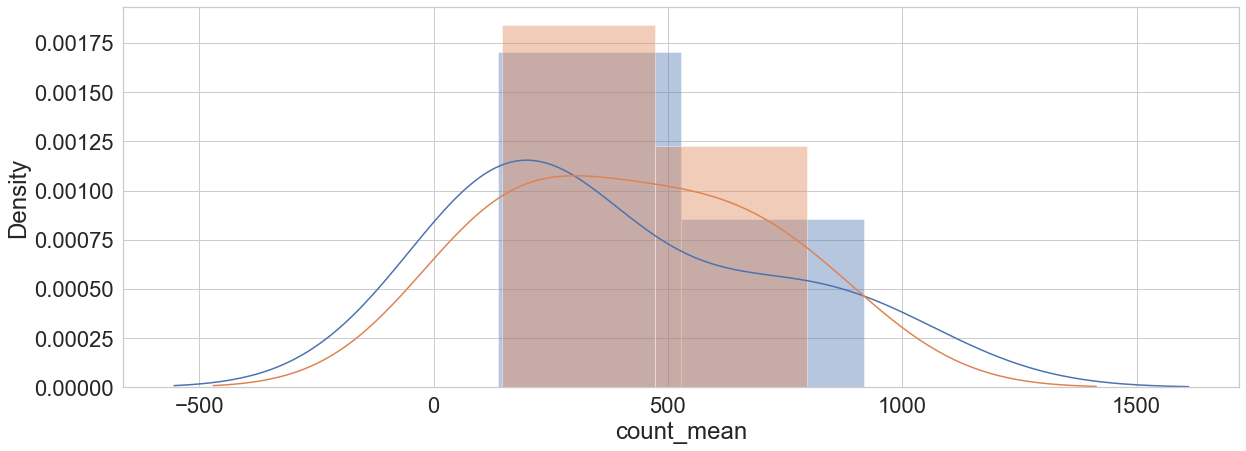

In [43]:
sns.distplot(count_view.count_mean)
sns.distplot(roll_mean.count_mean)

In [50]:
# Объединим датафреймы для получения разницы по модулю между арифметическим средним и скользящим средним в дальнейшем.
merge_count = count_view.merge(roll_mean, how = 'inner', on = 'date')

In [51]:
merge_count

,date,count_mean_x,count_mean_y
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.134626
2,2019-04-03,163.952778,150.869880
3,2019-04-04,675.901720,419.927249
4,2019-04-05,919.109677,797.505699
5,2019-04-06,277.122727,598.116202


In [52]:
# Добавили колонку delta с разницей между арифметическим средним и скользящим средним
merge_count['delta'] = abs(merge_count.count_mean_x - merge_count.count_mean_y)

In [53]:
merge_count

,date,count_mean_x,count_mean_y,delta
0,2019-04-01,154.482270,NaN,NaN
1,2019-04-02,137.786982,146.134626,8.347644
2,2019-04-03,163.952778,150.869880,13.082898
3,2019-04-04,675.901720,419.927249,255.974471
4,2019-04-05,919.109677,797.505699,121.603979
5,2019-04-06,277.122727,598.116202,320.993475


In [54]:
# Вернули данные для которых разница максимальна
merge_count[merge_count.delta == merge_count.delta.max()]

,date,count_mean_x,count_mean_y,delta
5,2019-04-06,277.122727,598.116202,320.993475


In [55]:
# Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного
# клиента(create_date) и первым запуском рекламного объявления этим клиентом(date).
# В качестве ответа укажите среднее число дней.

In [56]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [57]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [58]:
# Объединили таблицы на основании client_union_id
merge_ads = ads_data.merge(ads_clients_data, on = 'client_union_id')

In [59]:
merge_ads.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [60]:
# Поменяли данные у date_x и create_date
merge_ads.date_x = pd.to_datetime(merge_ads.date_x)
merge_ads.create_date = pd.to_datetime(merge_ads.create_date)

In [61]:
merge_ads.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [62]:
# Из даты посещения вычли дату создания кабинета
merge_ads['delta'] = merge_ads.date_x - merge_ads.create_date

In [63]:
merge_ads.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,delta
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days


In [64]:
# Сгруппировали по client_union_id и посчитали среднее для delta
mean_delta = merge_ads.groupby('client_union_id', as_index=False).agg({'delta': 'mean'}).sort_values('delta')

In [65]:
mean_delta.delta.mean()

Timedelta('124 days 15:38:55.524424108')

In [66]:
# Сложное задание!
# Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

# Конверсия - отношение числа клиентов, которые совершии целевое действие (создали рекламу), к общему числу клиентов.
# Например 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу.

# Чтобы отобрать данные за нужный прромежуток, можно воспользоваться сравнением времени до создания первой рекламы
#  с pd.Timedelta(365, unit = 'day')

# Ответ дать в процентах и округлить до сотых.

# NB! Унас могут быть люди, которые не сделали рекламу вообще. Не забудьте их учесть. 

In [67]:
# Возьмем первоначальные данные для объединения

In [68]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [69]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [70]:
# Посчитаем количество уникальных кабинетов в данных только по кабинетам
unique_clients_data = ads_clients_data.client_union_id.nunique()

In [71]:
unique_clients_data

122078

In [72]:
# Посчитать количество уникальных кабинетов, у которых есть хотя бы одна реклама, в данных по рекламам.

In [73]:
unique_data = ads_data.client_union_id.nunique()

In [74]:
unique_data

838

In [75]:
# Исходя из того, что у нас нет клиентов, которые создали рекламу больше чем через 365 дней. Поэтому находим конверсию
round(unique_data/unique_clients_data*100, 2)

0.69

In [76]:
# Давайте разобьем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

# Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования(от 0 да 30 дней).
# Список промежутков дней для метода pd.cut() - [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью 
#  pd.to_timedelta().

# Могут пригодиться:
# pd.cut()
# value_counts

In [77]:
# Нашли дату первого объявления для клиентов
first_ad = merge_ads.groupby('client_union_id', as_index=False).agg({'date_x': 'min'})

In [78]:
# Нашли список дат создания рекламных кабинетов
create_d = merge_ads.groupby('client_union_id', as_index=False).agg({'create_date': 'min'})

In [79]:
# Объединили фреймы
date_megre = first_ad.merge(create_d)

In [80]:
# Добавили колонку времени разница между датами создания первого объявления и датой создания кабинета.
date_megre['delta'] = date_megre.date_x - date_megre.create_date

In [82]:
date_megre.head()

,client_union_id,date_x,create_date,delta
0,1,2019-04-01,2018-12-24,98 days
1,9,2019-04-03,2018-12-10,114 days
2,13,2019-04-02,2019-01-26,66 days
3,16,2019-04-03,2018-12-19,105 days
4,20,2019-04-02,2019-03-01,32 days


In [83]:
# Список промежутков дней для метода pd.cut() - [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью 
#  pd.to_timedelta().
date_megre['delta'] = pd.cut(date_megre.delta, pd.to_timedelta(['0d', '30d', '90d', '180d', '365d']),
                                                              labels = ['0-30 days', '30-90 days', '90-180 days', '180-365 days'])

In [84]:
# Узнали в какие промежутки входят наши клиенты
date_megre.delta.value_counts()

90-180 days     396
30-90 days      263
180-365 days    168
0-30 days        11
Name: delta, dtype: int64

In [85]:
# Построить интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них
#  (то, что у вас получилось на прошлом степе, по запуску  первого рекламного объявления). Расположите их так, чтобы внизу
# была самая малочисленная, а наверху самая большая.

In [86]:
date_megre

,client_union_id,date_x,create_date,delta
0,1,2019-04-01,2018-12-24,90-180 days
1,9,2019-04-03,2018-12-10,90-180 days
2,13,2019-04-02,2019-01-26,30-90 days
3,16,2019-04-03,2018-12-19,90-180 days
4,20,2019-04-02,2019-03-01,30-90 days
...,...,...,...,...
833,122004,2019-04-01,2019-01-24,30-90 days
834,122013,2019-04-04,2018-11-04,90-180 days
835,122023,2019-04-04,2018-11-29,90-180 days
836,122031,2019-04-05,2018-12-30,90-180 days


In [90]:
px.bar(x=date_megre.delta)